# <center>NLP Sentiment Analysis for phrases/reviews 
    

#### Libraries used:

In [7]:
from string import punctuation
from os import listdir
from collections import Counter

In [8]:
import sys
import os
import urllib.request
import tarfile
import zipfile
import glob
import pandas as pd

In [9]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
####from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from sklearn.svm import SVC
####from textblob import TextBlob
####from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
import spacy
import re,string,unicodedata

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.spatial.distance import cdist
from keras.models import Sequential
from keras.layers import Dense, GRU, Embedding,LSTM
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [272]:
# Our Stopwords 
stopWords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"]

In [273]:
len(stopWords) #NLTK stopwords have 127 words (Some words doesn't exist e.g: i'd, you'll)

153

In [274]:
# load doc into memory
def loadVocab(filename):  
    file = open(filename,'r')                             # open the file as read only 
    text = file.read()                                    # read all text
    file.close()                                          # close the file
    return text

In [275]:
# load doc into memory
def loadDocs(filename):            
    file = open(filename, encoding="utf8")                # open the file as read only
    text = file.read()                                    # read all text
    file.close()                                          # close the file
    return text

In [276]:
# turn a doc into clean tokens
def cleaningProcess(doc):
    tokens = doc.split()                                  # split into tokens by white space  
    table = str.maketrans('', '', punctuation)            # remove punctuation from each token
    tokens = [w.translate(table) for w in tokens]         # Process of translating
    tokens = [word for word in tokens if word.isalpha()]  # remove remaining tokens that are not alphabetic
    tokens = [w for w in tokens if not w in stopWords]    # filter out stop words
    tokens = [word for word in tokens if len(word) > 1]   # filter out short tokens
    return tokens

In [277]:
# save list to file
def saveList(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [278]:
# load doc, clean and return line of tokens ### deleted in other
def docToLine(filename, vocab): 
    doc = loadDocs(filename)                             # load the doc 
    tokens = cleaningProcess(doc)                        # clean doc
    tokens = [w for w in tokens if w in vocab]           # filter by vocab
    return ' '.join(tokens)

In [279]:
# load all docs in a directory
def processDocs(directory, vocab):
    lines = list()
    for filename in listdir(directory):                  # walk through all files in the folder
        if not filename.endswith(".txt"):                # skip files that do not have the right extension
            continue
        path = directory + '/' + filename                # create the full path of the file to open
        line = docToLine(path, vocab)                    # load and clean the doc
        lines.append(line)                               # add to list
    return lines

### Training Dataset:

In [280]:
vocab_filename = 'vocab.txt'
vocab = loadVocab(vocab_filename)                        # load vocabulary
vocab = vocab.split()
vocab = set(vocab)
                                                         # prepare negative reviews
negative_lines = processDocs('C:/Users/Jeyamaruthi/ML/neg', vocab)
saveList(negative_lines, 'negative.txt')                 # Saving in a .txt file
                                                         # prepare positive reviews
positive_lines = processDocs('C:/Users/Jeyamaruthi/ML/pos', vocab)
saveList(positive_lines, 'positive.txt')                 # Saving in a .txt file



In [281]:
negative_lines[0]

'man unnatural pig opening scene terrific example absurd comedy formal orchestra audience turned insane violent mob crazy absurd time no general narrative eventually making just off putting era turned off cryptic dialogue make seem easy third grader technical level better might think good cinematography future great can seen briefly'

In [282]:
x_train_text = positive_lines + negative_lines
y_train = [1.0] * len(positive_lines) + [0.0] * len(negative_lines)

In [283]:
x_train_text[0]

'cartoon comedy ran time school life teaching profession lead believe satire much closer reality scramble survive financially insightful can see right pathetic pomp whole situation remind knew saw episode student repeatedly tried burn school immediately recalled classic line sack one expect many age think far fetched pity isnt'

In [284]:
y_train[0]

1.0

### Testing Dataset

In [285]:
vocab_filename = 'vocab.txt'
vocab = loadVocab(vocab_filename)                        # load vocabulary
vocab = vocab.split()
vocab = set(vocab)
                                                         # prepare negative reviews
negative_lines_test = processDocs('C:/Users/Jeyamaruthi/ML/testing/neg', vocab)
saveList(negative_lines, 'negative_test.txt')                 # Saving in a .txt file
                                                         # prepare positive reviews
positive_lines_test = processDocs('C:/Users/Jeyamaruthi/ML/testing/pos', vocab)
saveList(positive_lines, 'positive_test.txt')                 # Saving in a .txt file

In [286]:
negative_lines_test[0]

'dragged movie far longer necessary terrific sea rescue just not care us closet character realized early forgotten much later time not care character really care cocky overconfident problem off kid better anyone else around no cluttered closet obstacle appears winning well past half way point stinker us told driven best no prior inkling foreshadowing magic keep turning off hour'

In [287]:
x_test_text = positive_lines_test + negative_lines_test  
y_test = [1.0] * len(positive_lines_test) + [0.0] * len(negative_lines_test)

In [288]:
x_test_text[0]

'went saw movie last night mine admit reluctant see knew able comedy wrong played character well played professionalism sign good movie can toy one exactly entire theater sold overcome laughter first half movie moved second half exiting theater not saw many many full grown men well trying desperately not let anyone see movie great suggest go see judge'

In [289]:
y_test[0]

1.0

#### Let us begin with the modeling:

In [290]:
num_words = 10000

In [291]:
tokenizer = Tokenizer(num_words=num_words)

In [292]:
%%time
tokenizer.fit_on_texts(x_test_text)

Wall time: 1.63 s


In [293]:
tokenizer.word_index

{'movie': 1,
 'film': 2,
 'not': 3,
 'one': 4,
 'like': 5,
 'just': 6,
 'good': 7,
 'time': 8,
 'really': 9,
 'see': 10,
 'even': 11,
 'can': 12,
 'story': 13,
 'no': 14,
 'much': 15,
 'get': 16,
 'will': 17,
 'bad': 18,
 'great': 19,
 'people': 20,
 'well': 21,
 'make': 22,
 'also': 23,
 'first': 24,
 'made': 25,
 'dont': 26,
 'way': 27,
 'think': 28,
 'seen': 29,
 'character': 30,
 'watch': 31,
 'many': 32,
 'know': 33,
 'never': 34,
 'acting': 35,
 'plot': 36,
 'two': 37,
 'love': 38,
 'show': 39,
 'best': 40,
 'little': 41,
 'ever': 42,
 'life': 43,
 'better': 44,
 'off': 45,
 'scene': 46,
 'say': 47,
 'end': 48,
 'something': 49,
 'still': 50,
 'didnt': 51,
 'go': 52,
 'real': 53,
 'thing': 54,
 'back': 55,
 'doesnt': 56,
 'watching': 57,
 'man': 58,
 'funny': 59,
 'find': 60,
 'actually': 61,
 'lot': 62,
 'going': 63,
 'work': 64,
 'look': 65,
 'cant': 66,
 'though': 67,
 'another': 68,
 'part': 69,
 'old': 70,
 'want': 71,
 'nothing': 72,
 'every': 73,
 'cast': 74,
 'around': 75

In [294]:
x_train_tokens = tokenizer.texts_to_sequences(x_train_text)

In [295]:
x_train_tokens[0]

[769,
 101,
 1442,
 8,
 224,
 43,
 2495,
 3906,
 289,
 134,
 1567,
 15,
 1958,
 413,
 1341,
 6484,
 3497,
 12,
 10,
 105,
 804,
 93,
 572,
 2319,
 428,
 91,
 260,
 994,
 2137,
 483,
 2579,
 224,
 862,
 7537,
 222,
 221,
 6301,
 4,
 326,
 32,
 497,
 28,
 115,
 4583,
 1779,
 90]

#### Preprocesseing for Sequential Deep learning model

In [296]:
np.array(x_train_tokens[1])

array([2447, 1271,   34, 1118,  191,  866,  875,  247,  165,   63,  224,
         64, 1316,  311,   20,   28, 4293,    6,  321,  748, 5892, 1854,
        233, 2131, 1791, 5892, 2725,  226,   48,  216, 1861,  299, 2552,
        102,  210,  561, 2661, 1321, 1020,  165, 2225,   10,    5, 4293,
       3166,  710,   58,  165,  111, 4687,   22, 1861, 2227,   10,   12,
        299, 2534,  102, 1908,   12,  559,  931,  138,  897,  866, 3164,
       9007,   73,  554,   66, 1427,   45, 7313,  216, 6232,  284, 5571,
        380,  146,  230,   82, 3241, 1626,  210,  301,  174,   90,    3,
        174, 3521, 5669,    5,  710,  382, 1906,  343,   38, 1452,  154,
       1257,   36,  125,    4, 8550, 1831,  101, 3088,  333,  858, 1450,
         64,  311,   39,    5,   49, 3332, 1626,  226,  177,  419,  138,
        205, 1861,    5,  710,   20,   26,   33,  164,   85, 4293,  237,
        560,    5,  238,    2,   17, 3431,  191,  240])

In [297]:
np.array(x_train_tokens[1])

array([2447, 1271,   34, 1118,  191,  866,  875,  247,  165,   63,  224,
         64, 1316,  311,   20,   28, 4293,    6,  321,  748, 5892, 1854,
        233, 2131, 1791, 5892, 2725,  226,   48,  216, 1861,  299, 2552,
        102,  210,  561, 2661, 1321, 1020,  165, 2225,   10,    5, 4293,
       3166,  710,   58,  165,  111, 4687,   22, 1861, 2227,   10,   12,
        299, 2534,  102, 1908,   12,  559,  931,  138,  897,  866, 3164,
       9007,   73,  554,   66, 1427,   45, 7313,  216, 6232,  284, 5571,
        380,  146,  230,   82, 3241, 1626,  210,  301,  174,   90,    3,
        174, 3521, 5669,    5,  710,  382, 1906,  343,   38, 1452,  154,
       1257,   36,  125,    4, 8550, 1831,  101, 3088,  333,  858, 1450,
         64,  311,   39,    5,   49, 3332, 1626,  226,  177,  419,  138,
        205, 1861,    5,  710,   20,   26,   33,  164,   85, 4293,  237,
        560,    5,  238,    2,   17, 3431,  191,  240])

In [298]:
x_test_tokens = tokenizer.texts_to_sequences(x_test_text)

In [299]:
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

In [300]:
num_tokens

array([ 46, 140,  54, ..., 100,  40, 132])

In [301]:
np.mean(num_tokens)

83.94654

In [302]:
np.max(num_tokens)

824

In [303]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

206

In [304]:
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.94538

In [305]:
pad = 'pre'

In [306]:
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens,
                            padding=pad, truncating=pad)

In [307]:
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens,
                           padding=pad, truncating=pad)

In [308]:
x_train_pad.shape

(25000, 206)

In [309]:
x_test_pad.shape

(25000, 206)

In [310]:
np.array(x_train_tokens[1])

array([2447, 1271,   34, 1118,  191,  866,  875,  247,  165,   63,  224,
         64, 1316,  311,   20,   28, 4293,    6,  321,  748, 5892, 1854,
        233, 2131, 1791, 5892, 2725,  226,   48,  216, 1861,  299, 2552,
        102,  210,  561, 2661, 1321, 1020,  165, 2225,   10,    5, 4293,
       3166,  710,   58,  165,  111, 4687,   22, 1861, 2227,   10,   12,
        299, 2534,  102, 1908,   12,  559,  931,  138,  897,  866, 3164,
       9007,   73,  554,   66, 1427,   45, 7313,  216, 6232,  284, 5571,
        380,  146,  230,   82, 3241, 1626,  210,  301,  174,   90,    3,
        174, 3521, 5669,    5,  710,  382, 1906,  343,   38, 1452,  154,
       1257,   36,  125,    4, 8550, 1831,  101, 3088,  333,  858, 1450,
         64,  311,   39,    5,   49, 3332, 1626,  226,  177,  419,  138,
        205, 1861,    5,  710,   20,   26,   33,  164,   85, 4293,  237,
        560,    5,  238,    2,   17, 3431,  191,  240])

In [311]:
x_train_pad[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       2447, 1271,   34, 1118,  191,  866,  875,  247,  165,   63,  224,
         64, 1316,  311,   20,   28, 4293,    6,  321,  748, 5892, 1854,
        233, 2131, 1791, 5892, 2725,  226,   48,  216, 1861,  299, 2552,
        102,  210,  561, 2661, 1321, 1020,  165, 2225,   10,    5, 4293,
       3166,  710,   58,  165,  111, 4687,   22, 1861, 2227,   10,   12,
        299, 2534,  102, 1908,   12,  559,  931,  138,  897,  866, 3164,
       9007,   73,  554,   66, 1427,   45, 7313,  216, 6232,  284, 5571,
        380,  146,  230,   82, 3241, 1626,  210,  3

In [312]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

In [313]:
def tokensToString(tokens):
    words = [inverse_map[token] for token in tokens if token != 0]
    
    text = " ".join(words)

    return text

In [314]:
x_train_text[0]

'cartoon comedy ran time school life teaching profession lead believe satire much closer reality scramble survive financially insightful can see right pathetic pomp whole situation remind knew saw episode student repeatedly tried burn school immediately recalled classic line sack one expect many age think far fetched pity isnt'

In [315]:
tokensToString(x_train_tokens[0])

'cartoon comedy ran time school life teaching profession lead believe satire much closer reality survive financially insightful can see right pathetic whole situation remind knew saw episode student repeatedly tried burn school immediately recalled classic line sack one expect many age think far fetched pity isnt'

#### Initializing the model

In [316]:
model = Sequential()

In [317]:
embedding_size = 8

In [318]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='layer_embedding'))

#### adding LSTM layer & Sigmoid activation along with Adam optimization algorithm

In [319]:
model.add(LSTM(units=16, return_sequences=True))

In [320]:
model.add(LSTM(units=8, return_sequences=True))

In [321]:
model.add(LSTM(units=4))

In [322]:
model.add(Dense(1, activation='sigmoid'))

In [323]:
optimizer = Adam(lr=1e-3) #optimization algorithm

In [324]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [325]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_embedding (Embedding)  (None, 206, 8)            80000     
_________________________________________________________________
lstm_9 (LSTM)                (None, 206, 16)           1600      
_________________________________________________________________
lstm_10 (LSTM)               (None, 206, 8)            800       
_________________________________________________________________
lstm_11 (LSTM)               (None, 4)                 208       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 82,613
Trainable params: 82,613
Non-trainable params: 0
_________________________________________________________________


In [326]:
y_numpy = np.array(y_train)
y_numpy

array([1., 1., 1., ..., 0., 0., 0.])

#### Fitting the model

In [327]:
%%time
model.fit(x_train_pad, y_numpy,validation_split=0.05, epochs=2, batch_size=64)

Epoch 1/2
372/372 [==============================] - 49s 131ms/step - loss: 0.4562 - accuracy: 0.7798 - val_loss: 0.4206 - val_accuracy: 0.8296
Epoch 2/2
372/372 [==============================] - 52s 139ms/step - loss: 0.2682 - accuracy: 0.8977 - val_loss: 0.3219 - val_accuracy: 0.8568
Wall time: 1min 44s


In [328]:
x_test_pad

array([[   0,    0,    0, ...,   52,   10, 1465],
       [   0,    0,    0, ...,  682,   60,  166],
       [   0,    0,    0, ...,  247,  334,  284],
       ...,
       [   0,    0,    0, ...,   18,   15,   44],
       [   0,    0,    0, ...,  732,    9,   71],
       [   0,    0,    0, ...,   37,    6,  802]])

In [329]:
%%time
result = model.evaluate(x_test_pad, y_numpy)

782/782 [==============================] - 23s 29ms/step - loss: 0.3300 - accuracy: 0.8587
Wall time: 23.1 s


In [4]:

print("Accuracy: {0:.2%}".format(result[1]))

Accuracy: 93.33%


In [331]:
ModelAccuracy = result[1] *100
ModelAccuracy

85.8680009841919

#### Evaluation Analysis for Neural Networks

### Incorrect Entry

In [332]:
%%time
y_pred = model.predict(x=x_test_pad[0:1000])
y_pred = y_pred.T[0]

Wall time: 1.48 s


In [333]:
y_pred

array([0.55649906, 0.9152925 , 0.80812466, 0.9483121 , 0.9722855 ,
       0.75953436, 0.96373737, 0.441306  , 0.91500735, 0.95387596,
       0.5761739 , 0.96510154, 0.97451276, 0.9576341 , 0.2115579 ,
       0.95213467, 0.9009818 , 0.7374287 , 0.88869965, 0.39838904,
       0.5054623 , 0.8378722 , 0.9758344 , 0.89080703, 0.7378894 ,
       0.9335265 , 0.85685503, 0.48798683, 0.937719  , 0.9629272 ,
       0.9021709 , 0.9712844 , 0.8339702 , 0.96510154, 0.9138565 ,
       0.91814196, 0.91899014, 0.9091932 , 0.7605553 , 0.9400674 ,
       0.9607535 , 0.9748895 , 0.0557501 , 0.82235813, 0.8758689 ,
       0.9607749 , 0.8132056 , 0.9515457 , 0.97193456, 0.96558577,
       0.9682784 , 0.58911455, 0.97323453, 0.9589633 , 0.7599933 ,
       0.96595454, 0.8862182 , 0.9462483 , 0.83969796, 0.8890484 ,
       0.959599  , 0.91382396, 0.95047176, 0.63634217, 0.7620377 ,
       0.8133042 , 0.6144052 , 0.9501582 , 0.9536169 , 0.7111784 ,
       0.95216495, 0.9572935 , 0.9746804 , 0.04025942, 0.95459

In [334]:
cls_pred = np.array([1.0 if p>0.5 else 0.0 for p in y_pred])

In [335]:
cls_pred[0]

1.0

In [336]:
cls_true = np.array(y_test[0:1000])

In [337]:
incorrect = np.where(cls_pred != cls_true)
incorrect = incorrect[0]

In [338]:
len(incorrect)

143

In [339]:
idx = incorrect[0]
idx

7

In [340]:
text = x_test_text[idx]
text

'felt film many good cinematography certainly different exposing stage aspect set story original certainly achievement felt played quite convincingly course playing definitely unique cultural may leave many disappointed familiarity culture will answer lot regarding parentchild stigma drug use found story interesting note story fashion music reek early even though made really cheesy sometimes crap etc not top ten twenty television check'

In [341]:
y_pred[idx]

0.441306

In [342]:
cls_true[idx]

1.0

### Correct Entry

In [343]:
correct = np.where(cls_pred == cls_true)
correct = correct[0]

In [344]:
len(correct)

857

In [345]:
idx = correct[0]
idx

0

In [346]:
text = x_test_text[idx]
text

'went saw movie last night mine admit reluctant see knew able comedy wrong played character well played professionalism sign good movie can toy one exactly entire theater sold overcome laughter first half movie moved second half exiting theater not saw many many full grown men well trying desperately not let anyone see movie great suggest go see judge'

In [347]:
y_pred[idx]

0.55649906

In [348]:
cls_true[idx]

1.0

In [349]:
y_pred = model.predict(x=x_test_pad)

In [351]:
x_test_pad

array([[   0,    0,    0, ...,   52,   10, 1465],
       [   0,    0,    0, ...,  682,   60,  166],
       [   0,    0,    0, ...,  247,  334,  284],
       ...,
       [   0,    0,    0, ...,   18,   15,   44],
       [   0,    0,    0, ...,  732,    9,   71],
       [   0,    0,    0, ...,   37,    6,  802]])

### Sample testing:

#### Negative Case:

In [353]:
x =  ['this movie is waste of my time, I have no idea why I went to this movie'] #["Hey,this movie is worst than anything I have ever seen"] #
x

['this movie is waste of my time, I have no idea why I went to this movie']

In [354]:
x_test_tokens_temp = tokenizer.texts_to_sequences(x)
x_test_tokens_temp

[[1, 296, 8, 14, 171, 229, 1]]

In [355]:
x_test_pad_temp = pad_sequences(x_test_tokens_temp, maxlen=max_tokens,
                           padding=pad, truncating=pad)
x_test_pad_temp

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [356]:
%%time
y_pred = model.predict(x=x_test_pad_temp)
y_pred = y_pred.T[0]
y_pred

Wall time: 49 ms


array([0.16472653], dtype=float32)

In [357]:
if y_pred > 0.5:
    print("Positive")
else:
    print("Negative")

Negative


#### Positive Case:

In [358]:
x_pos = ["This movie is the best thing I have ever seen"] #['This movie helped me to improve my whole career'] #
x_pos

['This movie is the best thing I have ever seen']

In [359]:
x_test_tokens_temp_pos = tokenizer.texts_to_sequences(x_pos)
x_test_tokens_temp_pos

[[1, 40, 54, 42, 29]]

In [360]:
x_test_pad_temp_pos = pad_sequences(x_test_tokens_temp_pos, maxlen=max_tokens,
                           padding=pad, truncating=pad)
x_test_pad_temp_pos

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 40, 54, 42, 29]])

In [361]:
y_pred_pos

array([0.6562178], dtype=float32)

In [362]:
%%time
y_pred_pos = model.predict(x=x_test_pad_temp_pos)
y_pred_pos = y_pred_pos.T[0]
y_pred_pos

Wall time: 60.2 ms


array([0.58425206], dtype=float32)

In [363]:
if y_pred_pos > 0.5:
    print("Positive")
else:
    print("Negative")

Positive


### Other Algorithms:

In [364]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.naive_bayes import BernoulliNB

In [365]:
tfidf = TfidfVectorizer(tokenizer=x_train_tokens)
classifier = LinearSVC()

In [366]:
clf = Pipeline([('tfidf',tfidf),('clf',classifier)])

In [367]:
cv = CountVectorizer(binary=True)
cv.fit(x_train_text)
X = cv.transform(x_train_text)
X_test = cv.transform(x_test_text)

#### Logistic Regression

In [368]:
final_model = LogisticRegression(C=0.05)
final_model.fit(X, y_train)
LRAccuracyScore = accuracy_score(y_test, final_model.predict(X_test)) * 100
print ("Final Accuracy: %s" 
       % LRAccuracyScore)

Final Accuracy: 87.03999999999999


#### Bernoulli

In [369]:
model = BernoulliNB()
model.fit(X, y_train)
BAccuracyScore = accuracy_score(y_test, model.predict(X_test)) * 100
print ("Final Accuracy: %s" 
       % BAccuracyScore)

Final Accuracy: 85.184


#### Gradient Boost Classifier

In [370]:
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

GBC = GradientBoostingClassifier()
# Gradient Boost Classifier Fitting
GBC.fit(X, y_train)
GBCaccuracyScore = accuracy_score(y_test, GBC.predict(X_test)) * 100
print ("Gradient Boost Classifier Predicting")
print ("Final Accuracy: %s" 
       % GBCaccuracyScore)

Gradient Boost Classifier Predicting
Final Accuracy: 80.184


#### Bagged Decision Tree Classifier

In [371]:
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

BC = BaggingClassifier(base_estimator=DecisionTreeClassifier())
# Bagged Decision Tree Fitting
BC.fit(X, y_train)

BDTaccuracyScore = accuracy_score(y_test, BC.predict(X_test)) * 100
print ("Bagged Decision Tree Predicting")
print ("Final Accuracy: %s" 
       % BDTaccuracyScore)

Bagged Decision Tree Predicting
Final Accuracy: 77.068


#### Support Vector Machine

In [372]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(X, y_train)
SVMaccuracyScore = accuracy_score(y_test, SVM.predict(X_test)) * 100
print ("Final Accuracy: %s" 
       % SVMaccuracyScore)

Final Accuracy: 87.164


In [373]:
print("Our  Neural Network model: %.2f"%ModelAccuracy)
print("Logistic Regression model: %.2f"%LRAccuracyScore)
print("Bernoulli model: %.2f"%BAccuracyScore)
print("Gradient Boost Classifier model: %.2f"%GBCaccuracyScore)
print("Bagged Decision Tree Classifier model: %.2f"%BDTaccuracyScore)
print("Support Vector Machine model: %.2f"%SVMaccuracyScore)

Our  Neural Network model: 85.87
Logistic Regression model: 87.04
Bernoulli model: 85.18
Gradient Boost Classifier model: 80.18
Bagged Decision Tree Classifier model: 77.07
Support Vector Machine model: 87.16


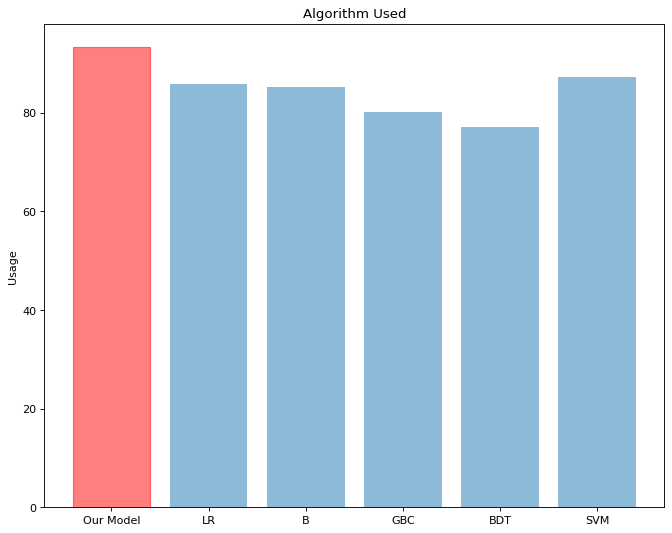

In [11]:
from matplotlib.pyplot import figure
objects = ('Our Model', 'LR', 'B', 'GBC', 'BDT', 'SVM')
y_pos = np.arange(len(objects))
performance = [ModelAccuracy,LRAccuracyScore,BAccuracyScore,GBCaccuracyScore,BDTaccuracyScore,SVMaccuracyScore]

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
barchart = plt.bar(y_pos, performance, align='center', alpha=0.5)
barchart[0].set_color('r')
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Algorithm Used')

plt.show()